In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
3386,00016705_009.png,Consolidation|Nodule,9,16705,025Y,M,AP,2500,2048,0.168,0.168
3287,00016231_005.png,Atelectasis|Effusion,5,16231,043Y,M,AP,3056,2544,0.139,0.139
1481,00007717_001.png,No Finding,1,7717,022Y,M,PA,2500,2048,0.168,0.168


In [3]:
list_labels = [str(x).split('|') for x in all_xray_df['Finding Labels']] #take list with sublists of labels per each patient
labels = list(np.unique([subitem for item in list_labels for subitem in item])) #take the unique labels

In [4]:
# adding the labels into the table to use it for our analysis

for i in labels:
    all_xray_df[i] = [1 if x.find(i)>=0 else 0 for x in all_xray_df['Finding Labels']]

In [5]:
all_xray_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
78878,00019363_042.png,Cardiomegaly|Consolidation|Effusion|Infiltration,42,19363,55,F,AP,3056,2544,0.139,...,0,0,0,1,0,0,0,0,0,0
54513,00013670_020.png,Infiltration,20,13670,56,M,AP,2500,2048,0.168,...,0,0,0,1,0,0,0,0,0,0
62768,00015530_096.png,Infiltration,96,15530,20,M,AP,3056,2544,0.139,...,0,0,0,1,0,0,0,0,0,0
5850,00001577_002.png,No Finding,2,1577,11,F,AP,2048,2500,0.168,...,0,0,0,0,0,1,0,0,0,0
26649,00006981_011.png,Effusion,11,6981,61,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
58779,00014546_011.png,No Finding,11,14546,58,M,PA,2758,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
17009,00004556_005.png,No Finding,5,4556,38,F,AP,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0
58090,00014370_000.png,No Finding,0,14370,47,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
55217,00013833_003.png,No Finding,3,13833,46,M,AP,2500,2048,0.168,...,0,0,0,0,0,1,0,0,0,0
104422,00027927_014.png,Atelectasis,14,27927,57,F,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,0,0,0


### Age distribution

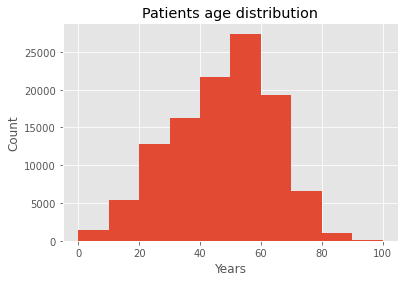

In [6]:
## EDA
ages = all_xray_df['Patient Age']
plt.style.use('ggplot')
plt.hist(ages, range=(0,100)) #there are some patients with incorrect age, some of 400 which is not possible
plt.title('Patients age distribution')
plt.xlabel('Years'), plt.ylabel('Count')
plt.show()

Patients from all range of ages have been considered, however most of the cases where from the range of 20 to 70 years. However, it's a uniform and normally distribution of ages, so we can apply our algorithm to any patient with independecy of its age.

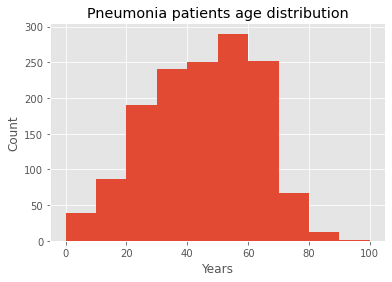

In [7]:
pneumonia = all_xray_df[all_xray_df['Pneumonia']==1]
pneumonia_ages = pneumonia['Patient Age']
plt.hist(pneumonia_ages, range=(0,100)) #there are some patients with incorrect age, some of 400 which is not possible
plt.title('Pneumonia patients age distribution')
plt.xlabel('Years'), plt.ylabel('Count')
plt.show()

Most of our pneumonia patients are older than 20 and younger than 70, however we also have patients of all range of age so the algorithm can be perfectly use to any patient with independency of its age.

### Gender distribution

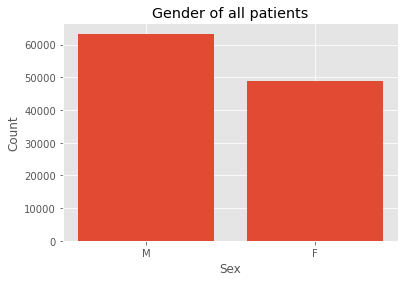

In [8]:
gender = all_xray_df['Patient Gender']
plt.bar(['M', 'F'], [len(gender[gender=='M']), len(gender[gender=='F'])])
plt.title('Gender of all patients')
plt.xlabel('Sex'), plt.ylabel('Count')
plt.show()

There is a majority of males in our study, instead we can consider the algorithm is valid for both gender because the difference between genders is not too high and the number of females considered it's almost 50,000.

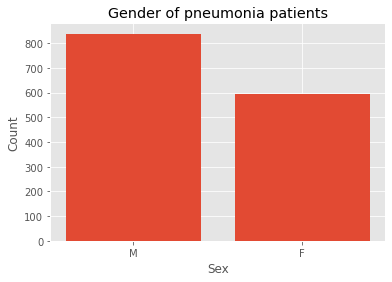

In [9]:
gender_pneumonia = pneumonia['Patient Gender']
plt.bar(['M', 'F'], [len(gender_pneumonia[gender_pneumonia=='M']), len(gender_pneumonia[gender_pneumonia=='F'])])
plt.title('Gender of pneumonia patients')
plt.xlabel('Sex'), plt.ylabel('Count')
plt.show()

Almost 600 womens have pneumonia which in comparison to the male patients is correct to consider that the algorithm is useful for both genders.

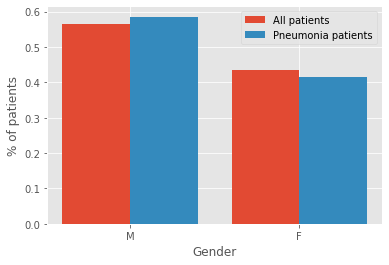

In [10]:
x = ['M', 'F']
comp_all = [len(gender[gender=='M'])/len(gender), len(gender[gender=='F'])/len(gender)]
comp_pneum = [len(gender_pneumonia[gender_pneumonia=='M'])/len(gender_pneumonia), len(gender_pneumonia[gender_pneumonia=='F'])/len(gender_pneumonia)]
w = 0.4 # width of the bar
bar1 = np.arange(len(x))
bar2 = [w+i for i in bar1]

plt.bar(bar1, comp_all, w, label='All patients')
plt.bar(bar2, comp_pneum, w, label='Pneumonia patients')
plt.xlabel('Gender'), plt.ylabel('% of patients')
plt.xticks(bar1+w/2,x)
plt.legend()
plt.show()

The proportion between male and female patients is quite similar in both groups, all patients and pneumonia patients but in both the proportion of females exceeds the 40%. This demonstrates that our algorithm can be used for both genders where there is a similar proportion in both datasets.

Comparing both datasets, we can see that pneumonia is a bit more prevalent in males than females because there is an increase in the proportion of patients compared to the total dataset. However, the difference is not too high and can be consequence of the small amount of patients in pneumonia compared to total.

### Position

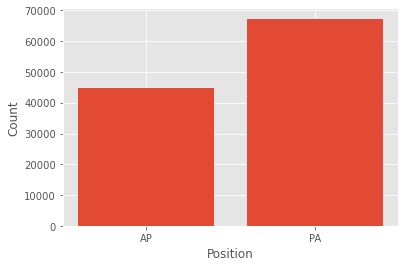

In [11]:
position = all_xray_df['View Position']
labels_position = np.unique(position)
plt.bar(labels_position, [len(position[position==labels_position[0]]), len(position[position==labels_position[1]])])
plt.xlabel('Position'), plt.ylabel('Count')
plt.show()

PA position (posterior-anterior) is most used in X-ray images because has some benefits respect to AP (anterior-posterior):
* Lungs can be seen easily.
* Reduce the radiation dose of some sensitive organs.
* Bones like scapula don't alter the image (because of superposition).

For that reason we have more patients with PA position which almost double the AP ones.

## Pneumonia

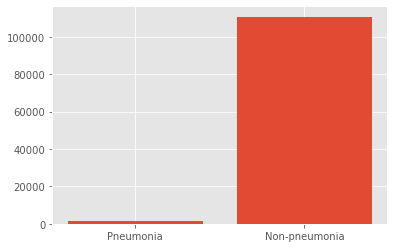

In [12]:
pneu = np.sum(all_xray_df['Pneumonia'], axis=0)
plt.bar(['Pneumonia', 'Non-pneumonia'], [pneu, len(all_xray_df)-pneu]) 
plt.show()

The number of cases of pneumonia in our dataset is greatly low compering with the non-pneumonia patients. This is produced for the x-ray in wild which considers all x-rays done without looking for pneumonia diagnosis specifically. 

When setting up the training dataset we have to take that into account. Due to the large amount of negative labels compared to positive ones, in our training dataset we will have to choose the same quantity of both to avoid imbalance in our model performing. Also, we will choose an 80% of our total dataset for training to have a real representation of real life and consider all diseases in our training dataset. The remaining 20% will be used for testing and evaluating the performance of the algorithm.

Images from PA and AP positions will be required with independency of their age and gender.

### Diseases

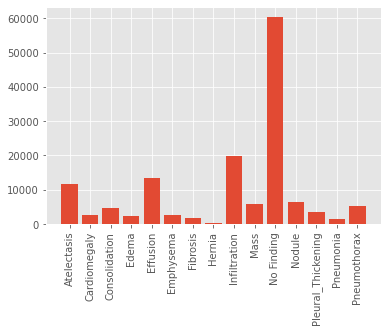

In [13]:
plt.bar(labels, np.sum(all_xray_df[labels], axis=0))
plt.xticks(rotation=90)
plt.show()

The number of patients with no finding is large compared to the other ones. This is due to x-ray in wild which considers not only people with a disease. However, x-ray thorax images are done for a diagnostic reason, so the proportions of each diseases are exagerated.

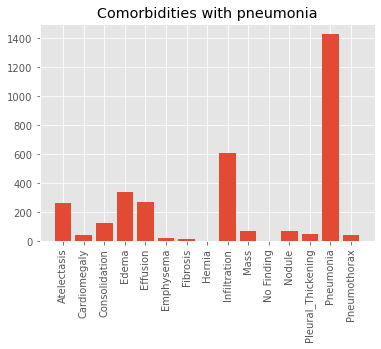

In [14]:
# comorbidities
pneum_patients = all_xray_df[all_xray_df['Pneumonia']==1]

plt.bar(labels, np.sum(pneum_patients[labels], axis=0))
plt.xticks(rotation=90)
plt.title('Comorbidities with pneumonia')
plt.show()

In case we focus on pneumonia patients and see comorbidities we find that some of the diseases change their proportion. In the case of edema, which was not very common (in proportion) compared to other diseases, it is closely related with pneumonia cases where more than 1/5 of the patients also have an edema. On the other side we have pneumothorax which its proportion decreases significantly because most of their cases are not related with pneumonia.

This graphic is really useful to relate different diseases, in this case with pneumonia patients.

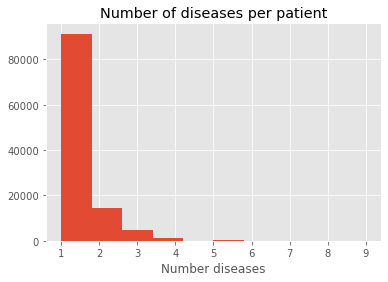

In [15]:
plt.hist([len(list_pat) for list_pat in list_labels])
plt.title('Number of diseases per patient'), plt.xlabel('Number diseases')
plt.show()

Most of patients considered in the dataset have only one disease, however there are others with two or three. In some extrem cases we have patients with till nine diseases simultaneously.

# Pixels

In [16]:
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,/data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,/data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,/data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,1,0,0,0,0,/data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,1,0,0,0,0,0,0,0,/data/images_001/images/00000003_000.png


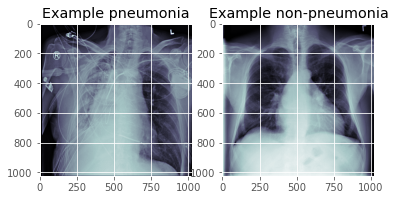

In [17]:
ex_pneum = plt.imread(all_xray_df[all_xray_df['Pneumonia']==1].path.values[0])
ex_non_pneum = plt.imread(all_xray_df[all_xray_df['Pneumonia']==0].path.values[0])
fig, ax = plt.subplots(1,2)
ax[0].imshow(ex_pneum, cmap='bone')
ax[0].set_title('Example pneumonia')

ax[1].imshow(ex_non_pneum, cmap='bone')
ax[1].set_title('Example non-pneumonia')

plt.show()

Images above show how pneumonia and non-pneumonia are represented, so we can see some particularities in both. The model has to be able to distinguish both images as different labels for our purpose of screening.

In [18]:
def normalize_image(img):
    img_mean = np.mean(img)
    img_std = np.std(img)
    norm_img = (img-img_mean)/(img_std)
    
    return norm_img

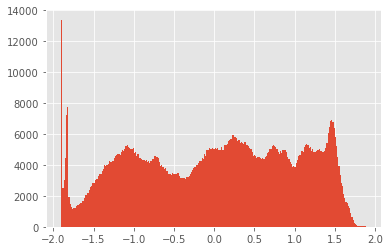

In [19]:
# distribution of one image
img = plt.imread(all_xray_df.path[0])
norm_img = normalize_image(img)
plt.hist(norm_img.ravel(), bins=256)
plt.show()

How an intensity distribution is ploted with an histogram. In the x-axis the intensities normalized and zero-meaning are shown while in the y-axis there is the count of different intensities with a peak in the lower intensity due to the background of the image which could be cut out with Ostu's method (fixing a threshold).

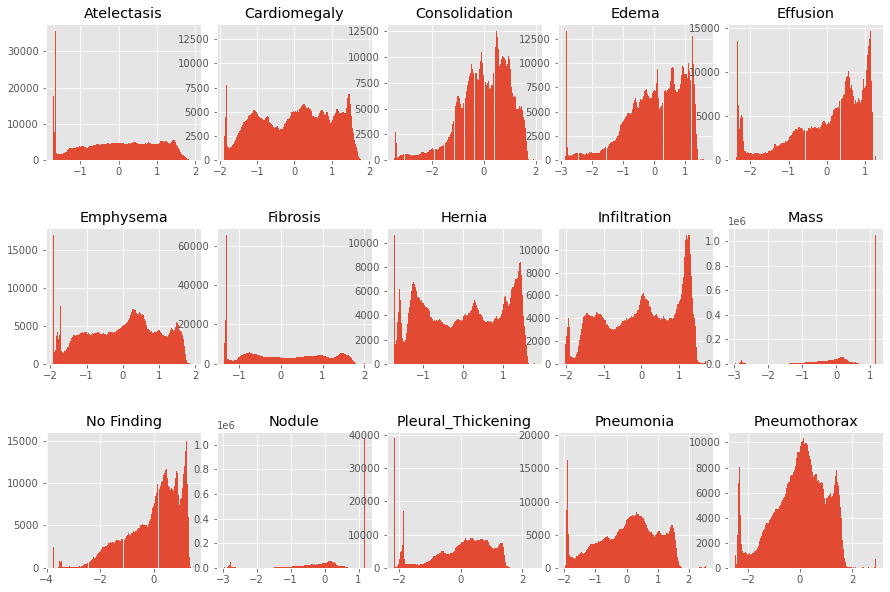

In [20]:
fig, axs = plt.subplots(3,5, figsize=(15, 10))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(len(labels)):
    lab = labels[i]
    img = plt.imread(list(all_xray_df[all_xray_df[lab]==1]['path'])[0])
    norm_img = normalize_image(img)
    axs[i].hist(norm_img.ravel(), bins=256)
    axs[i].set_title(lab)

**Diseases like emphysema, pneumothorax and pleural thickening can be confused with pneumonia, so the algorithm will not get great results with those diseases because their intensity distribution is quite similar.**

In [21]:
cum_arr = plt.imread((all_xray_df[all_xray_df['Pneumonia']==1]['path']).values[0])
for arr in (all_xray_df[all_xray_df['Pneumonia']==1]['path']).values[1:]:
    if len(plt.imread(arr).shape)==3:
        cum_arr += plt.imread(arr)[:,:,0]
    else:
        cum_arr += plt.imread(arr)
long = np.sum(all_xray_df['Pneumonia']==1)
mean_arr = cum_arr/long

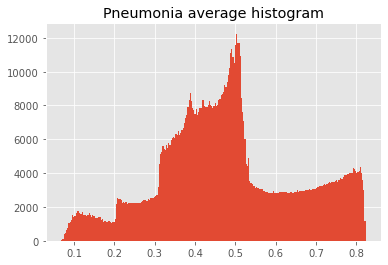

In [22]:
plt.hist(mean_arr.ravel(), bins=256)
plt.title('Pneumonia average histogram')
plt.show()

Mean intensity distribution of pneumonia patients considering all the pneumonia cases and calculating the mean for each intensity previously normalized. This will allow to compare with non-pneumonia patients.

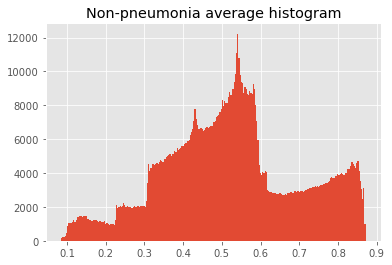

In [23]:
cum_arr = plt.imread((all_xray_df[all_xray_df['Pneumonia']==0]['path']).values[0])
for arr in (all_xray_df[all_xray_df['Pneumonia']==0]['path']).values[1:1000]: # only the first 1000 to be faster 
    if len(plt.imread(arr).shape)==3:
        cum_arr += plt.imread(arr)[:,:,0]
    else:
        cum_arr += plt.imread(arr)
long = np.sum((all_xray_df['Pneumonia']==0)[1:1000])
mean_arr = cum_arr/long

plt.hist(mean_arr.ravel(), bins=256)
plt.title('Non-pneumonia average histogram')
plt.show()

Mean intensity distribution of non-pneumonia patients which is quite similar to the pneumonia's one but with some differences in intensities between 0.5 and 0.6. Here we are considering all patients, those ones with other diseases including those who didn't have any disease.

### Comparison pneumonia patients

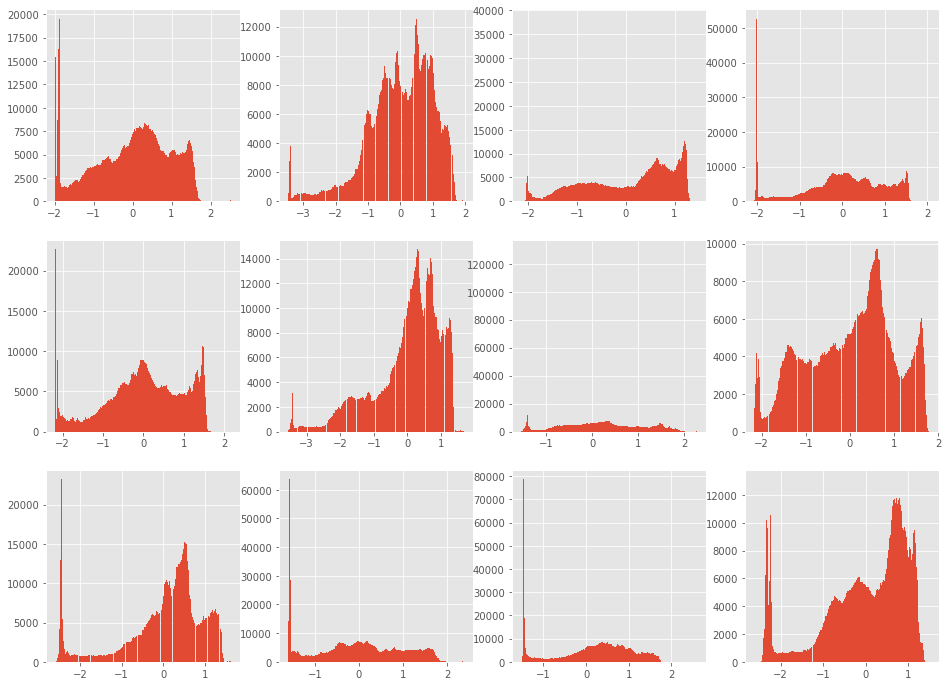

In [25]:
fig, ax = plt.subplots(3,4, figsize=(16,12))
ax = ax.ravel()
for i in range(12):
    img = plt.imread(list(all_xray_df[all_xray_df['Pneumonia']==1]['path'])[i])
    norm_img = normalize_image(img)
    ax[i].hist(norm_img.ravel(), bins=256)
plt.show()

In the case of comparing pneumonia patients we get different results for te images and despite some of them have a similar distribution, there are others which have a really different distribution which will make more difficult to differentiate with other diseases because they don't follow any pattern.

## Conclusion

Pneumonia and non-pneumonia patients present different intensities distributions, so will allow to classify the different classes thanks to their histogram. In the case of the last two plots, they have quite similar shape but a peak at 0.55 intensity is present in non-pneumonia histograms which is not in pneumonia. However, different diseases are taken into account and, as have been seen before, each disease has a different distribution.